In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api         as sm

In [4]:
# carga de datos
df = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Data_modelo.gzip',
    sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip',
    dtype = { # indicate categorical variables
        'NRO_SOLICITUD':'object',
        'COD_MODALIDAD':'object',
        'NOM_TIPOCLIENTE': "category",
        "SUCURSAL": "category",
        'MUNICIPIO_CLIENTE': "category",    
        #'REGION': "category",
        'UBICACIO_CLIENTE': "category", 
        'PERIODICIDAD': "category",
        'CALIFICACION_CIERRE': "category",
        'LINEA': "category",
        'TIPO_CREDITO':"category",
        'GENERO':"category",
        'NIVEL_DE_ESTUDIOS' :"category",   
        'NIVEL_DE_ESTUDIOS_NEW' :"category"   
    })

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605985 entries, 182952 to 790446
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   NRO_SOLICITUD          605985 non-null  object  
 1   OBLIGACION             605985 non-null  int64   
 2   PAGARE                 605985 non-null  object  
 3   NOM_TIPOCLIENTE        605985 non-null  category
 4   REGION                 605985 non-null  object  
 5   MUNICIPIO_CLIENTE      605985 non-null  category
 6   UBICACIO_CLIENTE       605985 non-null  category
 7   MONTO                  605985 non-null  int64   
 8   FEC_SOLICITUD          605985 non-null  object  
 9   FEC_APROBA             605985 non-null  object  
 10  FEC_DESEMBOLSO         605985 non-null  object  
 11  VALOR_CUOTA            605985 non-null  float64 
 12  CUOTAS_PACTADAS        605985 non-null  float64 
 13  CUOTAS_PENDIENTES      605985 non-null  float64 
 14  PERIODICIDAD   

In [6]:
df[df['OBLIGACION']==196002147].head(15)

,NRO_SOLICITUD,OBLIGACION,PAGARE,NOM_TIPOCLIENTE,REGION,MUNICIPIO_CLIENTE,UBICACIO_CLIENTE,MONTO,FEC_SOLICITUD,FEC_APROBA,...,MORA_STATUS,SUCURSAL,ESTRATO,DESTINACION,TIPO_VIVIENDA,CODEUDOR_REF,DEUDOR,ACUMULADO,NIVEL_DE_ESTUDIOS_NEW,AÑO_APROBACION
600468,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,0,0,Media,2019
600469,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,0,0,Media,2019
600470,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,0,0,Media,2019
600471,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,0,0,Media,2019
600472,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,1,0,Media,2019
600473,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,1,0,Media,2019
600474,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,1,0,Media,2019
600475,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,1,0,Media,2019
600476,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,1,0,Media,2019
600477,196002564,196002147,196002147,Microfinanciero,REGION ARIARI,LEJANIAS,RURAL,3000000,2019-11-14,2019-11-15,...,1.0,GRANADA,2.0,CAPITAL DE TRABAJO,Propia,1,1,0,Media,2019


In [7]:
# arreglar columnas para regresion logistica
list_columns = []

for x in range(len(df.columns)):
    list_columns.append(df.columns[x].replace(" ","_"))
df.columns = list_columns

In [8]:
# creacion de columna de cumpimiento y columna de plazo
def cumplio(x):
    if x > 0:
        return 1
    else:
        return 0

df['INCUMPLIMIENTO'] = df['DIAS_VENCIDO']
df['INCUMPLIMIENTO'] = df['INCUMPLIMIENTO'].apply(cumplio)

### Función de creación de formula para modelo

In [9]:
def model (v):   # funcion para crear formula del df
    cat = "DIAS_VENCIDO ~ "
    for x in v.columns:
        if x == v.columns[0]:
            cat = cat + x
        else:
            if x != 'DIAS_VENCIDO':
                cat = cat +" + "+ x
    return cat

### Función de entrenamiento (no se esta utilizando)


In [10]:
def train_d (v):
    np.random.seed(1337) # a seed makes the analysis reproducible
                         # so everyone will get the same results
    ndata = len(v)
    # Randomly choose 0.8n indices between 1 and n
    idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)
    # The test set is comprised from all the indices that were
    # not selected in the training set:
    idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
    train     = v.iloc[idx_train] # the training data set
    test      = v.iloc[idx_test]  # the test data set
    
    return train,test

## Función de normalización

In [11]:
def normalizacion (a):
    df_n = a.copy()
    c=[]
    for var in list(a.columns):
        if a.dtypes[var].name=='category':
            if var == 'INCUMPLIMIENTO':
                df_n[var]= a[var]
                
            elif  len(a[var].unique())>2:
                df_n[var]= a[var]
                c.append(var)
                
            else:
                df_n[var]= a[var].cat.codes
        else:

            if var == 'INCUMPLIMIENTO':
                df_n[var]= a[var]
                
            else:
                df_n[var]=(a[var]-a[var].mean())/a[var].std()

    df_n = pd.get_dummies(df_n,columns=c, drop_first=True) 


    return df_n

In [12]:
df_d = df[[
        #'NOM_TIPOCLIENTE', #el modelo solicita muchas iteraciones
        'UBICACIO_CLIENTE', # rural 0 o urbano 1
        'REGION',
        'MONTO', 
        'CUOTAS_PACTADAS', 'CUOTAS_PENDIENTES',
        #'PERIODICIDAD', #el modelo solicita muchas iteraciones
        'CALIFICACION_CIERRE', 
        #'LINEA', # el modelo no funciona solicita muchas iteraciones
        'SALDO_OBLIGACION',
        # 'DIAS_VENCIDO', 'CAPITAL_VEN', se quita porque tienen una relacion directa con el incumplimiento
        #'MUNICIPIO_CLIENTE', #  el modelo solicita muchas iteraciones
        'TIPO_CREDITO',  
        'TASA_NOM_ANUAL',
        'GENERO',  # 0 femenino y 1 masculino
        'EDAD',
        'NIVEL_DE_ESTUDIOS_NEW', #no es una variable categorica lineal
        'INCUMPLIMIENTO']].copy().dropna().reset_index(drop = True)


df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605780 entries, 0 to 605779
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   UBICACIO_CLIENTE       605780 non-null  category
 1   REGION                 605780 non-null  object  
 2   MONTO                  605780 non-null  int64   
 3   CUOTAS_PACTADAS        605780 non-null  float64 
 4   CUOTAS_PENDIENTES      605780 non-null  float64 
 5   CALIFICACION_CIERRE    605780 non-null  category
 6   SALDO_OBLIGACION       605780 non-null  int64   
 7   TIPO_CREDITO           605780 non-null  category
 8   TASA_NOM_ANUAL         605780 non-null  float64 
 9   GENERO                 605780 non-null  category
 10  EDAD                   605780 non-null  float64 
 11  NIVEL_DE_ESTUDIOS_NEW  605780 non-null  category
 12  INCUMPLIMIENTO         605780 non-null  int64   
dtypes: category(5), float64(4), int64(3), object(1)
memory usage: 39.9+ MB


In [13]:
df_d = df[[ 'NOM_TIPOCLIENTE', 'REGION'
        , 'UBICACIO_CLIENTE','MONTO', 'VALOR_CUOTA',
       'CUOTAS_PACTADAS', 'CUOTAS_PENDIENTES', 'PERIODICIDAD',
       'CALIFICACION_CIERRE', 'LINEA',  'SALDO_OBLIGACION',
        'DIAS_VENCIDO', 'CAPITAL_VEN', 
       'TIPO_CREDITO',  'TASA_NOM_ANUAL',
        'GENERO', 'EDAD',
       'NIVEL_DE_ESTUDIOS','INCUMPLIMIENTO']].copy().dropna()

df_d['TIPO_CREDITO']  = df_d['TIPO_CREDITO'].replace('SIN PERFIL','SIN_PERFIL',regex=True)
df_d['TIPO_CREDITO'].unique()

['NUEVO', 'PARALELO', 'RETANQUEADO', 'RENOVADO', 'SIN_PERFIL']
Categories (6, object): ['NUEVO', 'PARALELO', 'RENOVADO', 'RETANQUEADO', 'SIN PERFIL', 'SIN_PERFIL']

In [14]:
#df_dummyx = pd.get_dummies(dff,columns=['A','B','C','D','E','F','G','car_value','state'
#,'risk_factor','C_previous'], drop_first=True) #initial basisc categoric, aditional risk_factor and C_previous 

df_d = df[[
        #'NOM_TIPOCLIENTE', #el modelo solicita muchas iteraciones
        'UBICACIO_CLIENTE', # rural 0 o urbano 1
        'REGION',
        'MONTO', 
        'CUOTAS_PACTADAS', 'CUOTAS_PENDIENTES',
        #'PERIODICIDAD', #el modelo solicita muchas iteraciones
        'CALIFICACION_CIERRE', 
        #'LINEA', # el modelo no funciona solicita muchas iteraciones
        'SALDO_OBLIGACION',
        # 'DIAS_VENCIDO', 'CAPITAL_VEN', se quita porque tienen una relacion directa con el incumplimiento
        #'MUNICIPIO_CLIENTE', #  el modelo solicita muchas iteraciones
        'TIPO_CREDITO',  
        'TASA_NOM_ANUAL',
        'GENERO',  # 0 femenino y 1 masculino
        'EDAD',
        'NIVEL_DE_ESTUDIOS_NEW', #no es una variable categorica lineal
        'INCUMPLIMIENTO']].copy().dropna().reset_index(drop = True)


In [15]:

df_d['TIPO_CREDITO']  = df_d['TIPO_CREDITO'].replace('SIN PERFIL','SIN_PERFIL') # toca hcaerlo
df_d['REGION']  = df_d['REGION'].replace('ARIARI','REGION ARIARI') # toca hcaerlo
df_d['REGION']  = df_d['REGION'].replace('CENTRO NORTE','REGION CENTRO NORTE') # toca hcaerlo
df_d['REGION']  = df_d['REGION'].replace('SUR','REGION SUR')  
df_d['REGION']  = df_d['REGION'].replace('SUGAMUXI','REGION SUGAMUXI')  
df_d['REGION']  = df_d['REGION'].replace('VILLAVICENCIO','REGION VILLAVICENCIO')  
df_d['REGION']  = df_d['REGION'].replace('CENTRO BOYACA','REGION CENTRO BOYACA')  
df_d['REGION']  = df_d['REGION'].replace('REGION CRENTRO BOYACA','REGION CENTRO BOYACA')  

In [16]:
df_d['REGION'].unique()

array(['REGION CENTRO', 'REGION CENTRO NORTE', 'REGION SUR',
       'REGION VILLAVICENCIO', 'REGION META', 'REGION ARIARI',
       'REGION NORTE', 'REGION SUGAMUXI', 'REGION TUNDAMA',
       'REGION CENTRO BOYACA'], dtype=object)

In [17]:
df_d['REGION'] = df_d['REGION'].astype('category')
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605780 entries, 0 to 605779
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   UBICACIO_CLIENTE       605780 non-null  category
 1   REGION                 605780 non-null  category
 2   MONTO                  605780 non-null  int64   
 3   CUOTAS_PACTADAS        605780 non-null  float64 
 4   CUOTAS_PENDIENTES      605780 non-null  float64 
 5   CALIFICACION_CIERRE    605780 non-null  category
 6   SALDO_OBLIGACION       605780 non-null  int64   
 7   TIPO_CREDITO           605780 non-null  category
 8   TASA_NOM_ANUAL         605780 non-null  float64 
 9   GENERO                 605780 non-null  category
 10  EDAD                   605780 non-null  float64 
 11  NIVEL_DE_ESTUDIOS_NEW  605780 non-null  category
 12  INCUMPLIMIENTO         605780 non-null  int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 35.8 MB


In [18]:

df_n = normalizacion(df_d)
df_n['Intercept']=1

a=list(df_n.columns)#.remove("INCUMPLIMIENTO")
a.remove("INCUMPLIMIENTO")
a.remove("Intercept")
a.insert(0,"Intercept")

df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605780 entries, 0 to 605779
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   UBICACIO_CLIENTE                   605780 non-null  int8   
 1   MONTO                              605780 non-null  float64
 2   CUOTAS_PACTADAS                    605780 non-null  float64
 3   CUOTAS_PENDIENTES                  605780 non-null  float64
 4   SALDO_OBLIGACION                   605780 non-null  float64
 5   TASA_NOM_ANUAL                     605780 non-null  float64
 6   GENERO                             605780 non-null  int8   
 7   EDAD                               605780 non-null  float64
 8   INCUMPLIMIENTO                     605780 non-null  int64  
 9   REGION_REGION CENTRO               605780 non-null  uint8  
 10  REGION_REGION CENTRO BOYACA        605780 non-null  uint8  
 11  REGION_REGION CENTRO NORTE         6057

In [19]:

#train_all = train_d (df_df)[0]   # train with df_dummyx data of the exercise 2

model = sm.Logit(df_n['INCUMPLIMIENTO'], df_n[a]).fit()

#model = smf.ols(formula = model(df_df), data = train_all).fit()

#df_n['INCUMPLIMIENTO'].unique()

# sin NIVEL_DE_ESTUDIOS 0.3981
#NIVEL_DE_ESTUDIOS 0.3991
#TASA_NOM_ANUAL 0.3995
#'TIPO_CREDITO' 0.40

#nuevo modelo 0.379

Optimization terminated successfully.
         Current function value: 0.325952
         Iterations 8


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         INCUMPLIMIENTO   No. Observations:               605780
Model:                          Logit   Df Residuals:                   605750
Method:                           MLE   Df Model:                           29
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.3785
Time:                        17:55:12   Log-Likelihood:            -1.9746e+05
converged:                       True   LL-Null:                   -3.1769e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.3483      0.015   -159.410      0.000      -2.377      -2.319
UBICACIO_CLIENTE                      0.1792      0.011     16.822      0.000       0.158       0.200
MONTO                                -0.1421      0.013    -10.823      0.000      -0.168      -0.116
CUOTAS_PACTADAS                       0.6848      0.008     84.331      0.000       0.669       0.701
CUOTAS_PENDIENTES                    -0.6479      0.010    -66.840      0.000      -0.667      -0.629
SALDO_OBLIGACION                      0.0979      0.015      6.636      0.000       0.069       0.127
TASA_NOM_ANUAL                        0.0846      0.006     14.784      0.000       0.073       0.096
GENERO                                0.1025      0.009     11.825      0.000       0.086       0.119
EDAD                                 -0.1618      0.005    -35.644      0.000      -0.171      -0.153
REGION_REGION CENTRO                  0.1213      0.016      7.786      0.000       0.091       0.152
REGION_REGION CENTRO BOYACA           0.4883      0.041     11.804      0.000       0.407       0.569
REGION_REGION CENTRO NORTE            0.2397      0.038      6.304      0.000       0.165       0.314
REGION_REGION META                    0.2092      0.025      8.298      0.000       0.160       0.259
REGION_REGION NORTE                   0.0472      0.016      3.028      0.002       0.017       0.078
REGION_REGION SUGAMUXI                0.2444      0.018     13.796      0.000       0.210       0.279
REGION_REGION SUR                     0.1201      0.015      8.047      0.000       0.091       0.149
REGION_REGION TUNDAMA                 0.2789      0.034      8.238      0.000       0.213       0.345
REGION_REGION VILLAVICENCIO           0.0662      0.016      4.242      0.000       0.036       0.097
CALIFICACION_CIERRE_B                 3.8305      0.026    149.521      0.000       3.780       3.881
CALIFICACION_CIERRE_C                 4.4197      0.039    112.506      0.000       4.343       4.497
CALIFICACION_CIERRE_D                 4.4499      0.045     98.638      0.000       4.361       4.538
CALIFICACION_CIERRE_E                 6.2422      0.039    161.879      0.000       6.167       6.318
TIPO_CREDITO_PARALELO                -0.0696      0.016     -4.341      0.000      -0.101      -0.038
TIPO_CREDITO_RENOVADO                -0.0374      0.011     -3.278      0.001      -0.060      -0.015
TIPO_CREDITO_RETANQUEADO              0.0182      0.011      1.592      0.111      -0.004       0.041
TIPO_CREDITO_SIN_PERFIL              -0.0186      0.032     -0.583      0.560      -0.081       0.044
NIVEL_DE_ESTUDIOS_NEW_Desconocido     0.0629      0.232      0.271      0.787      -0.393       0.518
NIVEL_DE_ESTUDIOS_NEW_Media           0.0887      0.013      6.654      0.000       0.063       0.115
NIVEL_DE_ESTUDIOS_NEW_Ninguno        -0.2588      0.047     -5.561      0.000  

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predict=model.predict(df_n[a])
roc_p = roc_curve(df_n['INCUMPLIMIENTO'], predict)
k=70700
print(roc_p[0][k],'-',roc_p[1][k],'-',roc_p[2][k])
p=roc_p[2][k]

0.26999531335103844 - 0.7502157554468787 - 0.1304755233950338


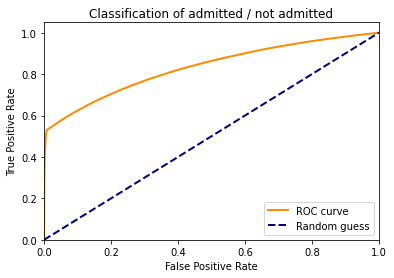

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predict=model.predict(df_n[a])
roc_p = roc_curve(df_n['INCUMPLIMIENTO'], predict)

model_res = model

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width, label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of admitted / not admitted')
plt.legend(loc='lower right')
plt.show()

In [23]:
auc_p = auc(roc_p[0],roc_p[1])
auc_p


#AUC 0.6359656005710596 cuando no tiene la varaible "Califiacion al Cierre" 
#AUC 0.8389919660706917 cuando tiene la varaible "Califiacion al Cierre"  buen TEST

0.831549749790629

In [24]:
model.params.index

Index(['Intercept', 'UBICACIO_CLIENTE', 'MONTO', 'CUOTAS_PACTADAS',
       'CUOTAS_PENDIENTES', 'SALDO_OBLIGACION', 'TASA_NOM_ANUAL', 'GENERO',
       'EDAD', 'REGION_REGION CENTRO', 'REGION_REGION CENTRO BOYACA',
       'REGION_REGION CENTRO NORTE', 'REGION_REGION META',
       'REGION_REGION NORTE', 'REGION_REGION SUGAMUXI', 'REGION_REGION SUR',
       'REGION_REGION TUNDAMA', 'REGION_REGION VILLAVICENCIO',
       'CALIFICACION_CIERRE_B', 'CALIFICACION_CIERRE_C',
       'CALIFICACION_CIERRE_D', 'CALIFICACION_CIERRE_E',
       'TIPO_CREDITO_PARALELO', 'TIPO_CREDITO_RENOVADO',
       'TIPO_CREDITO_RETANQUEADO', 'TIPO_CREDITO_SIN_PERFIL',
       'NIVEL_DE_ESTUDIOS_NEW_Desconocido', 'NIVEL_DE_ESTUDIOS_NEW_Media',
       'NIVEL_DE_ESTUDIOS_NEW_Ninguno', 'NIVEL_DE_ESTUDIOS_NEW_Superior'],
      dtype='object')

In [25]:
# varaibles binarias
UBICACIO_CLIENTE_D = {'RURAL':0,
                      'URBANA':1}

GENERO = {'Masculino' : 1,
          'Femenino' : 0}

In [26]:
# medias y desviascion estandar para normalizar

MONTO_mean = df_d['MONTO'].mean()
MONTO_std = df_d['MONTO'].std()

CUOTAS_PACTADAS_mean = df_d['CUOTAS_PACTADAS'].mean()
CUOTAS_PACTADAS_std = df_d['CUOTAS_PACTADAS'].std()

CUOTAS_PENDIENTES_mean = df_d['CUOTAS_PENDIENTES'].mean()
CUOTAS_PENDIENTES_std = df_d['CUOTAS_PENDIENTES'].std()

SALDO_OBLIGACION_mean = df_d['SALDO_OBLIGACION'].mean()
SALDO_OBLIGACION_std = df_d['SALDO_OBLIGACION'].std()

TASA_NOM_ANUAL_mean = df_d['TASA_NOM_ANUAL'].mean()
TASA_NOM_ANUAL_std = df_d['TASA_NOM_ANUAL'].std()

EDAD_mean = df_d['EDAD'].mean()
EDAD_std = df_d['EDAD'].std()


In [27]:
# variables dummies

REGION = {#'REGION CENTRO BOYACA':'REGION_REGION CENTRO BOYACA'  #al convertirse en dummie se descarta
'REGION CENTRO NORTE':'REGION_REGION CENTRO NORTE',
'REGION ARIARI':'REGION_REGION ARIARI',
'REGION CENTRO':'REGION_REGION CENTRO',
'REGION META':'REGION_REGION META',
'REGION NORTE':'REGION_REGION NORTE',
'REGION SUGAMUXI':'REGION_REGION SUGAMUXI',
'REGION SUR':'REGION_REGION SUR',
'REGION TUNDAMA':'REGION_REGION TUNDAMA',
'REGION VILLAVICENCIO':'REGION_REGION VILLAVICENCIO'}

CALIFICACION_CIERRE = {#'A':'CALIFICACION_CIERRE_A', #al convertirse en dummie se descarta
                        'B':'CALIFICACION_CIERRE_B',
                        'C':'CALIFICACION_CIERRE_C',
                        'D':'CALIFICACION_CIERRE_D',
                        'E':'CALIFICACION_CIERRE_E'}

TIPO_CREDITO = {#'NUEVO':'TIPO_CREDITO',  #al convertirse en dummie se descarta
                'PARALELO':'TIPO_CREDITO_PARALELO', 
                'RETANQUEADO':'TIPO_CREDITO_RETANQUEADO', 
                'RENOVADO':'TIPO_CREDITO_RENOVADO', 
                'SIN_PERFIL':'TIPO_CREDITO_SIN_PERFIL'}

NIVEL_DE_ESTUDIOS_NEW = {#'Basica':'NIVEL_DE_ESTUDIOS_NEW_Basica', #al convertirse en dummie se descarta
'Desconocido':'NIVEL_DE_ESTUDIOS_NEW_Desconocido',
'Media':'NIVEL_DE_ESTUDIOS_NEW_Media',
'Ninguno':'NIVEL_DE_ESTUDIOS_NEW_Ninguno',
'Superior':'NIVEL_DE_ESTUDIOS_NEW_Superior'}

In [28]:
list(model.params.index)

['Intercept',
 'UBICACIO_CLIENTE',
 'MONTO',
 'CUOTAS_PACTADAS',
 'CUOTAS_PENDIENTES',
 'SALDO_OBLIGACION',
 'TASA_NOM_ANUAL',
 'GENERO',
 'EDAD',
 'REGION_REGION CENTRO',
 'REGION_REGION CENTRO BOYACA',
 'REGION_REGION CENTRO NORTE',
 'REGION_REGION META',
 'REGION_REGION NORTE',
 'REGION_REGION SUGAMUXI',
 'REGION_REGION SUR',
 'REGION_REGION TUNDAMA',
 'REGION_REGION VILLAVICENCIO',
 'CALIFICACION_CIERRE_B',
 'CALIFICACION_CIERRE_C',
 'CALIFICACION_CIERRE_D',
 'CALIFICACION_CIERRE_E',
 'TIPO_CREDITO_PARALELO',
 'TIPO_CREDITO_RENOVADO',
 'TIPO_CREDITO_RETANQUEADO',
 'TIPO_CREDITO_SIN_PERFIL',
 'NIVEL_DE_ESTUDIOS_NEW_Desconocido',
 'NIVEL_DE_ESTUDIOS_NEW_Media',
 'NIVEL_DE_ESTUDIOS_NEW_Ninguno',
 'NIVEL_DE_ESTUDIOS_NEW_Superior']

## Funcion de prediccion

In [29]:
import numpy as np

def predictor(   v1,v2,v3,v4,v5,v6,v7,
                v8,v9,v10,v11,v12,v13,v14,
                v15,v16,v17,v18,v19,v20,v21,
                v22,v23,v24,v25,v26,v27,v28,v29,
                model,
                P): # entradas del modelo
    
    l = model.params  # coeficientes del modelo
    v = [v1,v2,v3,v4,v5,v6,v7,
        v8,v9,v10,v11,v12,v13,v14,
        v15,v16,v17,v18,v19,v20,v21,
        v22,v23,v24,v25,v26,v27,v28,v29]  # lista de las entradas
    b = l[0] #intercepto
     
    c=np.log(P/(1-P))
    
    for x in range(1,len(model.params)):
       
    
        b = b + (l[x]*v[x-1])
    
    d = b > c
    
    return d




In [30]:
df_PRE = df_n.sample(20).copy()


df_PRE["INCUMPLIMIENTO_PREDICT"] = df_PRE[[ 'UBICACIO_CLIENTE',
 'MONTO',
 'CUOTAS_PACTADAS',
 'CUOTAS_PENDIENTES',
 'SALDO_OBLIGACION',
 'TASA_NOM_ANUAL',
 'GENERO',
 'EDAD',
 'REGION_REGION CENTRO',
 'REGION_REGION CENTRO BOYACA',
 'REGION_REGION CENTRO NORTE',
 'REGION_REGION META',
 'REGION_REGION NORTE',
 'REGION_REGION SUGAMUXI',
 'REGION_REGION SUR',
 'REGION_REGION TUNDAMA',
 'REGION_REGION VILLAVICENCIO',
 'CALIFICACION_CIERRE_B',
 'CALIFICACION_CIERRE_C',
 'CALIFICACION_CIERRE_D',
 'CALIFICACION_CIERRE_E',
 'TIPO_CREDITO_PARALELO',
 'TIPO_CREDITO_RENOVADO',
 'TIPO_CREDITO_RETANQUEADO',
 'TIPO_CREDITO_SIN_PERFIL',
 'NIVEL_DE_ESTUDIOS_NEW_Desconocido',
 'NIVEL_DE_ESTUDIOS_NEW_Media',
 'NIVEL_DE_ESTUDIOS_NEW_Ninguno',
 'NIVEL_DE_ESTUDIOS_NEW_Superior']].apply(lambda x: predictor(x[0], x[1], x[2] ,x[3], x[4], x[5],x[6],
                                                                   x[7], x[8], x[9] ,x[10], x[11], x[12],x[13],
                                                                   x[14], x[15], x[16] ,x[17], x[18], x[19],x[20],
                                                                   x[21], x[22], x[23] ,x[24], x[25], x[26],x[27],x[28],model,p), axis=1)
resultado = df_PRE[["INCUMPLIMIENTO_PREDICT",'INCUMPLIMIENTO']].reset_index()
resultado.rename(columns={'index': 'COD_CLIENTE'}, inplace=True)
resultado
# df_PRE.index

,COD_CLIENTE,INCUMPLIMIENTO_PREDICT,INCUMPLIMIENTO
0,333255,False,0
1,453525,True,0
2,7154,False,0
3,249622,True,1
4,277601,True,0
5,36864,False,0
6,489115,False,0
7,55924,False,0
8,190551,False,0
9,324514,True,0


In [32]:
import joblib
#save model
joblib.dump(model_res,'/Universidad/DS4A 6/frontend_fundacion_amanecer/models/modelo_reglog1.data', compress=1)

['/Universidad/DS4A 6/frontend_fundacion_amanecer/models/modelo_reglog1.data']

In [33]:
#load saved model
model_reglog = joblib.load('/Universidad/DS4A 6/frontend_fundacion_amanecer/models/modelo_reglog1.data')

In [1]:
model_reglog.params
print(p)

NameError: name 'model_reglog' is not defined

In [54]:
prueba_reglog = df_PRE
prueba_reglog.to_csv('prueba_reglog.csv',index=True)
prueba_reglog.head()

,UBICACIO_CLIENTE,MONTO,CUOTAS_PACTADAS,CUOTAS_PENDIENTES,SALDO_OBLIGACION,TASA_NOM_ANUAL,GENERO,EDAD,INCUMPLIMIENTO,REGION_REGION CENTRO,...,TIPO_CREDITO_PARALELO,TIPO_CREDITO_RENOVADO,TIPO_CREDITO_RETANQUEADO,TIPO_CREDITO_SIN_PERFIL,NIVEL_DE_ESTUDIOS_NEW_Desconocido,NIVEL_DE_ESTUDIOS_NEW_Media,NIVEL_DE_ESTUDIOS_NEW_Ninguno,NIVEL_DE_ESTUDIOS_NEW_Superior,Intercept,INCUMPLIMIENTO_PREDICT
313277,1,0.770228,0.577191,-0.450914,-0.043945,0.435636,1,-0.872818,0,1,...,0,0,0,0,0,0,0,0,1,True
68183,1,-0.551693,-0.620888,0.001677,-0.313445,0.435636,1,0.655889,0,0,...,0,0,0,0,0,0,0,0,1,False
758,0,-0.551693,-0.021848,0.114824,-0.431478,0.439574,0,-0.490641,0,1,...,0,0,0,0,0,1,0,0,1,False
327181,1,1.210868,1.775270,1.359448,1.221279,0.435636,1,0.503019,0,1,...,0,1,0,0,0,0,0,0,1,True
574598,0,-0.331373,-0.021848,-0.450914,-0.446082,-0.226005,0,-0.108464,0,0,...,0,0,0,0,0,0,0,0,1,False


In [35]:
import requests
from io import StringIO

url='https://drive.google.com/file/d/1qTBCDbaC2cMmyqhKQDG1MbmWnXZJolKo/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df12 = pd.read_csv(csv_raw)
print(df12.head())

   Unnamed: 0  COD_DPTO DEPARTAMENTO  COD_MUN MUNICIPIO_CLIENTE
0          10        15       BOYACA    15832          TUNUNGUA
1          31        15       BOYACA    15476          MOTAVITA
2          87        15       BOYACA    15189           CIENEGA
3         103        50         META     5037             URIBE
4         170        15       BOYACA    15001             TUNJA
